In [1]:
import os
import torch
import torch.nn as nn 
from torch.nn import functional as F
from utils.common import setup_seed 
from MLPN.loader import init_dataset_train
from utils.loader import  init_dataset_test, environments
from utils.metrics import metrics
from MLPN.model import CSWinTransv2_threeIn
from MLPN.utils import extract_feature, get_id, extract_feature, SAM, SupConLoss, one_LPN_output
from torch.autograd import Variable

from torch.optim import lr_scheduler
from tqdm.contrib import tzip

from utils.competition import get_result_rank10, get_SatId_160k
from LPN.image_folder_ import CustomData160k_drone, CustomData160k_sat
from torchvision import datasets, transforms
from torchvision.transforms import InterpolationMode
import numpy as np
from tqdm import tqdm
import tarfile
import zipfile



def get_fixed_dataloader(dataloaders, style='mixed',num=None):
    dataloader_drone = list()
    dataloader_sat = list()
    cnt = 0
    for data, data3 in tzip(dataloaders['drone'], dataloaders['satellite']):
        dataloader_drone.append(data)
        dataloader_sat.append(data3)
        cnt = cnt + 1
        if type(num) is int and cnt==num:
            break
    print('done synthesis {} style image'.format(style))
    return dataloader_drone, dataloader_sat




c:\Users\lyq\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir=None
style='mixed'
model_name='net'
num_epochs=210
lr = 0.005
batchsize = 8
block = 4
checkpoint_interval = 10
checkpoint_start = 0
droprate = 0.75
update_aug_img = [40, 80, 120, 160, 180, 200]
num_worker_imgaug = 0


data_dir = os.path.join(os.getcwd(), 'University-Release', 'train')
image_datasets, dataloaders, dataset_sizes = init_dataset_train(data_dir, batchsize=batchsize, style=style, num_worker_imgaug=num_worker_imgaug)
dataloader_drone, dataloader_sat = get_fixed_dataloader(dataloaders, num=2)


c:\Users\lyq\.conda\envs\pytorch\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
  0%|          | 1/4732 [00:03<5:05:34,  3.88s/it]

done synthesis mixed style image


In [3]:
img, s_img, target, weather = dataloader_drone[1]

('light', 'dark', 'dark', 'fog_snow', 'dark', 'fog_snow', 'rain_snow', 'dark')
fog_snow


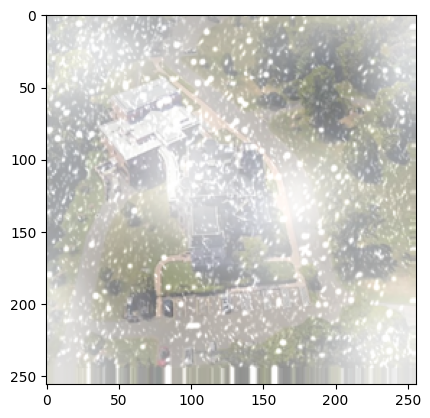

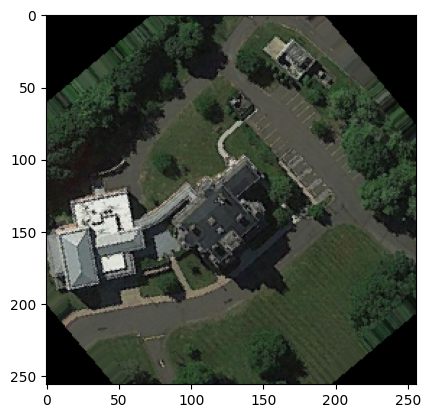

In [5]:
print(weather)

from matplotlib import pyplot as plt
import numpy as np

def imshow(img):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
    img = img.numpy()
    plt.imshow(np.transpose(img, (1,2,0)))
    plt.show() 

n = np.random.choice(list(range(8)))

print(weather[n])
imshow(img[n])
imshow(s_img[n])

In [6]:
img, s_img, target, weather = dataloader_sat[1]

('wind', 'fog_snow', 'fog_snow', 'fog', 'rain', 'light', 'wind', 'normal')
rain


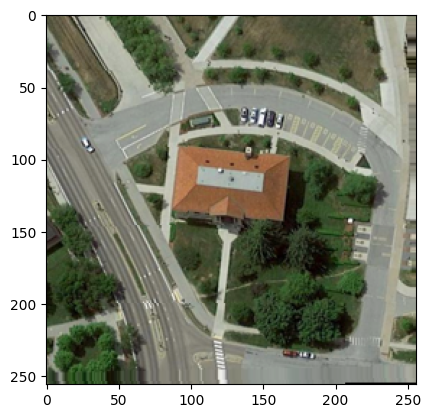

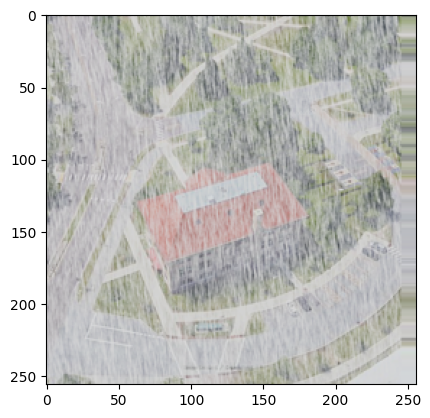

In [7]:
print(weather)

from matplotlib import pyplot as plt
import numpy as np

def imshow(img):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
    img = img.numpy()
    plt.imshow(np.transpose(img, (1,2,0)))
    plt.show() 

n = np.random.choice(list(range(8)))

print(weather[n])
imshow(img[n])
imshow(s_img[n])

In [8]:
print(list(range(10,23)))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
